 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [26]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [28]:
# Reading whale returns
csv_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [29]:
# Count nulls
whale_df.isnull().mean() * 1000
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [30]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [31]:
# Reading algorithmic returns
csv_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [32]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [33]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [34]:
# Reading S&P 500 Closing Prices
csv_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [35]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [36]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", " ")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df["Close"]

<ipython-input-36-a6b7f2416753>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", " ")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [40]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [43]:
# Drop nulls
sp500_daily_returns_df = sp500_daily_returns_df.dropna()

In [44]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df = sp500_daily_returns_df.rename(columns={
    "Close": "S&P 500",
})

sp500_daily_returns_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

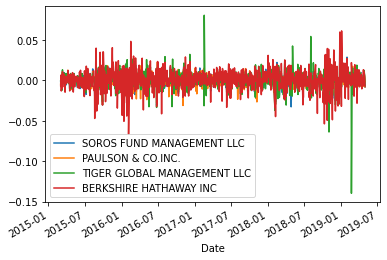

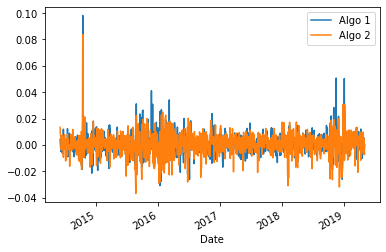

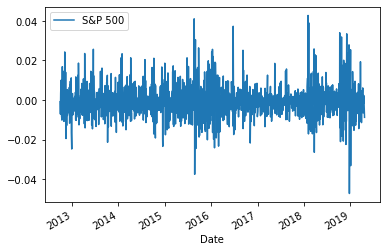

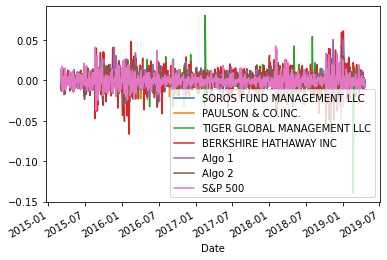

In [46]:
# Plot daily returns of all portfolios
whale_df.plot()
algo_df.plot()
sp500_daily_returns_df.plot()
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

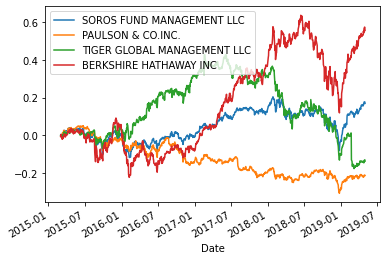

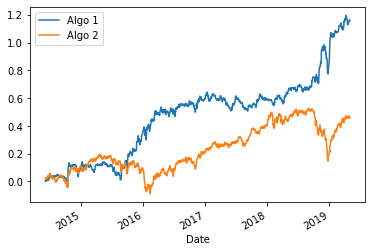

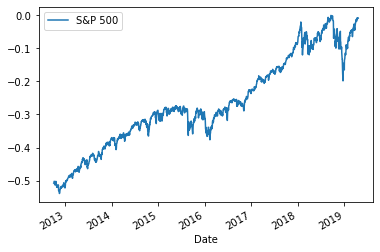

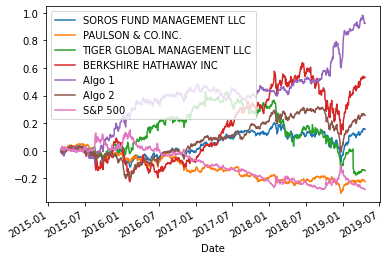

In [47]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1 + whale_df).cumprod() - 1
whale_cumulative_returns.head()

algo_cumulative_returns = (1 + algo_df).cumprod() - 1
algo_cumulative_returns.head()

sp500_cumulative_returns = (1 + sp500_daily_returns_df).cumprod() - 1
sp500_cumulative_returns.head()

combined_cumulative_returns = (1 + combined_df).cumprod() - 1
combined_cumulative_returns.head()
# Plot cumulative returns

whale_cumulative_returns.plot()
algo_cumulative_returns.plot()
sp500_cumulative_returns.plot()
combined_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

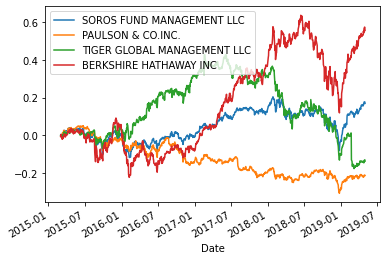

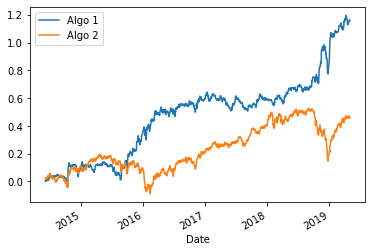

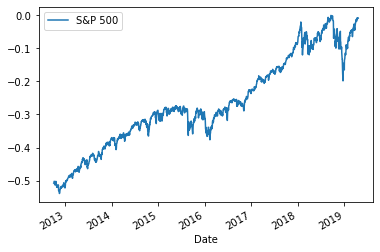

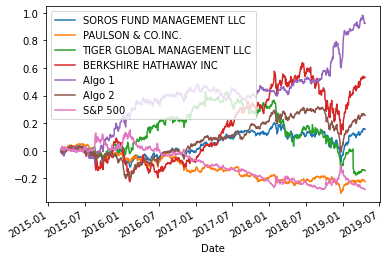

In [48]:
# Box plot to visually show risk
whale_cumulative_returns.plot()
algo_cumulative_returns.plot()
sp500_cumulative_returns.plot()
combined_cumulative_returns.plot()

### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [50]:
# Calculate  the daily standard deviation of S&P 500
volatility = sp500_daily_returns_df.std()
volatility.sort_values(inplace=True)
volatility
# Determine which portfolios are riskier than the S&P 500
volatility = combined_df.std()
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized standard deviation (252 trading days)
annual_volatility = combined_df.std() * np.sqrt(252)
annual_volatility.sort_values(inplace=True)
annual_volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

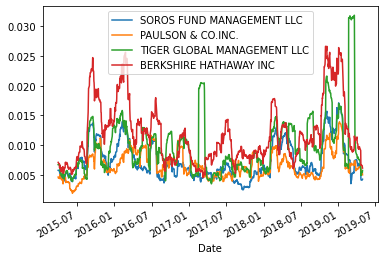

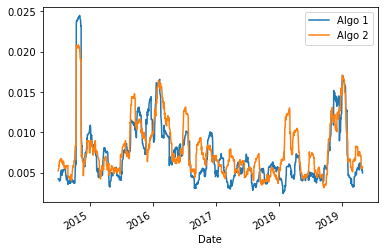

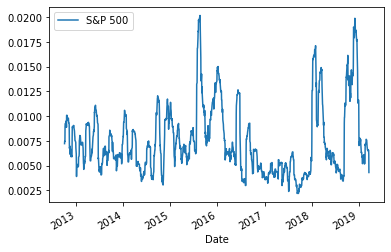

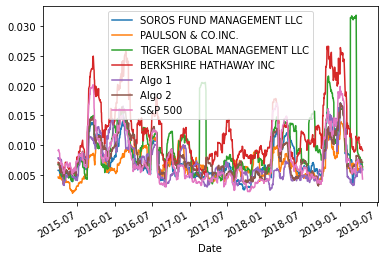

In [52]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_df.rolling(window=21).std()
algo_df.rolling(window=21).std()
sp500_daily_returns_df.rolling(window=21).std()
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
whale_df.rolling(window=21).std().plot()
algo_df.rolling(window=21).std().plot()
sp500_daily_returns_df.rolling(window=21).std().plot()
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [53]:
# Calculate the correlation
combined_df_correlation = combined_df.corr()
combined_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

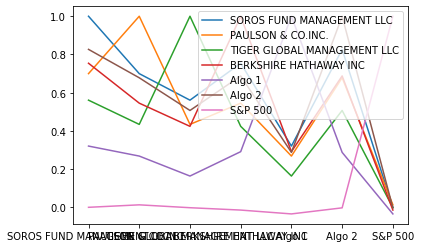

In [54]:
combined_df_correlation.plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

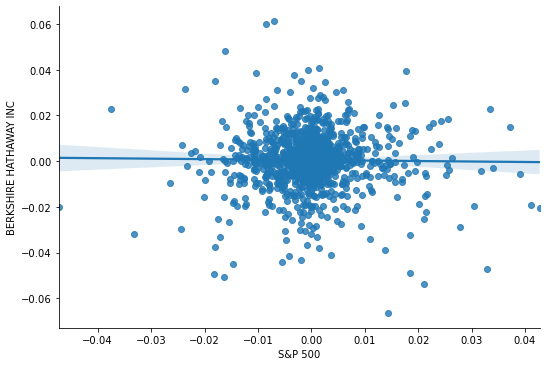

In [57]:
# Calculate covariance of a single portfolio
berk_whale_covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
berk_whale_covariance
# Calculate variance of S&P 500
sp500_variance = combined_df['S&P 500'].var()
sp500_variance
# Computing beta
berk_whale_beta = berk_whale_covariance / sp500_variance
berk_whale_beta
# Plot beta trend
import seaborn as sns
sns.lmplot(x='S&P 500', y='BERKSHIRE HATHAWAY INC', data=combined_df, aspect=1.5, fit_reg=True) 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

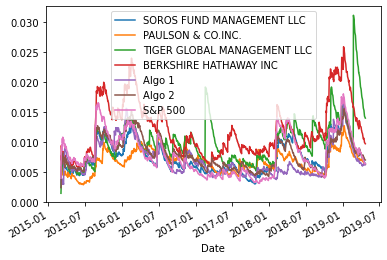

In [58]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
risk_free_rate_path= Path("../../../../Activities/03-Python-Pandas/3-Monday-3_1_21/16-Ins_Sharpe_Ratios/Resources/risk_free_rate.csv")
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
all_portfolios_df = pd.concat([combined_df, risk_free_rate], axis='columns', join='inner')

sharpe_ratios = ((all_portfolios_df.mean()-all_portfolios_df['rf_rate'].mean()) * 252) / (all_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
Algo 1                         1.138814
Algo 2                         0.297261
S&P 500                       -0.779208
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

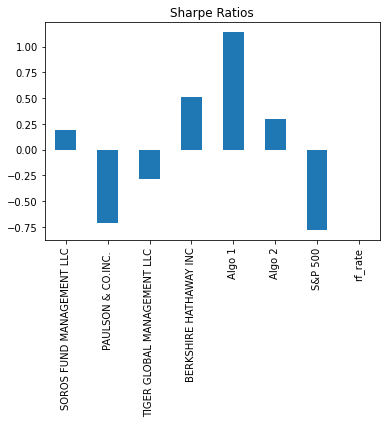

In [60]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [95]:
f"Algo 1 does out perform the S&P 500 and the other whale portfolios, however, Algo 2 is eclipsed by Berkshire Hathaway based on cumulative returns and higher Sharpe Ratios, respectively."

'Algo 1 does out perform the S&P 500 and the other whale portfolios, however, Algo 2 is eclipsed by Berkshire Hathaway based on cumulative returns and higher Sharpe Ratios, respectively.'

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [62]:
# Reading data from 1st stock
csv_path = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [63]:
# Reading data from 2nd stock
csv_path = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [64]:
# Reading data from 3rd stock
csv_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [65]:
# Combine all stocks in a single DataFrame
combined_port_df = pd.concat([google_df, apple_df, cost_df], axis="columns", join="inner")
combined_port_df.sort_index(inplace=True)
combined_port_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [ ]:
# Reset Date index


In [66]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol 1", "GOOG", "Symbol 2", "AAPL", "Symbol 3", "COST"]
combined_port_df.columns = columns
combined_port_df = combined_port_df.drop(columns=["Symbol 1", "Symbol 2", "Symbol 3"])
combined_port_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [67]:
# Calculate daily returns
combined_port_daily_returns_df = combined_port_df.pct_change()

# Drop NAs
combined_port_daily_returns_df.dropna()

# Display sample data
combined_port_daily_returns_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [70]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_portfolio_returns_df = combined_port_daily_returns_df.dot(weights)

# Display sample data
columns = ["LTCM"]
combined_portfolio_returns_df.columns = columns
combined_portfolio_returns_df.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_portfolio_df = pd.concat([all_portfolios_df, combined_portfolio_returns_df], axis="columns", join="inner")
all_combined_portfolio_df .sort_index(inplace=True)
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2","S&P 500", "rf_rate", "LTCM"]
all_combined_portfolio_df.columns = columns
all_combined_portfolio_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate,LTCM
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000209,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000211,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,0.000210,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.000209,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.000209,-0.001595


In [77]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_combined_portfolio_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate,LTCM
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000211,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,0.000210,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.000209,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.000209,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,0.000208,-0.006061
...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000264,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000264,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000266,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000263,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized `std`
all_combined_portfolio_annual_volatility = all_combined_portfolio_df.std() * np.sqrt(252)
all_combined_portfolio_annual_volatility.sort_values(inplace=True)
all_combined_portfolio_annual_volatility

rf_rate                        0.000345
PAULSON & CO.INC.              0.116741
Algo 1                         0.133956
Algo 2                         0.138738
SOROS FUND MANAGEMENT LLC      0.145920
S&P 500                        0.152774
LTCM                           0.210075
TIGER GLOBAL MANAGEMENT LLC    0.232702
BERKSHIRE HATHAWAY INC         0.246699
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

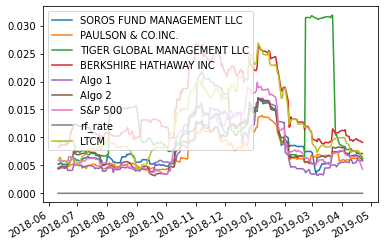

In [81]:
# Calculate rolling standard deviation
all_combined_portfolio_df.rolling(window=21).std()
# Plot rolling standard deviation
all_combined_portfolio_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [83]:
# Calculate and plot the correlation
all_combined_portfolio_df_correlation = all_combined_portfolio_df.corr()
all_combined_portfolio_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate,LTCM
SOROS FUND MANAGEMENT LLC,1.000000,0.789522,0.478722,0.814507,0.345841,0.859998,-0.026497,0.036673,0.728195
PAULSON & CO.INC.,0.789522,1.000000,0.485032,0.647531,0.366601,0.782482,-0.059014,-0.044787,0.640770
TIGER GLOBAL MANAGEMENT LLC,0.478722,0.485032,1.000000,0.324873,0.118810,0.410751,0.005578,-0.070440,0.389025
BERKSHIRE HATHAWAY INC,0.814507,0.647531,0.324873,1.000000,0.331230,0.779523,-0.037457,0.067299,0.800519
Algo 1,0.345841,0.366601,0.118810,0.331230,1.000000,0.371758,-0.054685,0.067294,0.271940
Algo 2,0.859998,0.782482,0.410751,0.779523,0.371758,1.000000,-0.040997,0.014996,0.736578
S&P 500,-0.026497,-0.059014,0.005578,-0.037457,-0.054685,-0.040997,1.000000,-0.007909,0.007264
rf_rate,0.036673,-0.044787,-0.070440,0.067299,0.067294,0.014996,-0.007909,1.000000,-0.014351
LTCM,0.728195,0.640770,0.389025,0.800519,0.271940,0.736578,0.007264,-0.014351,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

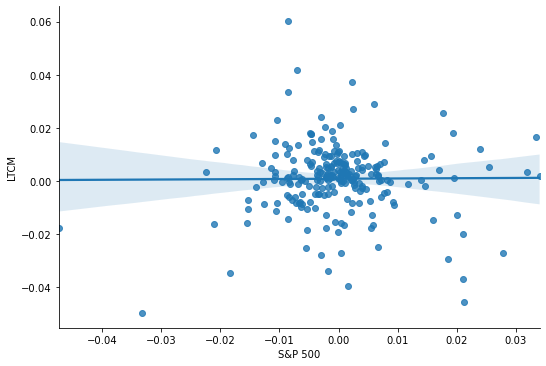

In [86]:
# Calculate and plot Beta
ltcm_covariance_60 = all_combined_portfolio_df['LTCM'].rolling(window=60).cov(all_combined_portfolio_df['S&P 500'])
ltcm_covariance_60
# Calculate variance of S&P 500
sp500_variance_60 = combined_df['S&P 500'].rolling(window=60).var()
sp500_variance_60
# Computing beta
ltcm_beta_60 = ltcm_covariance / sp500_variance
ltcm_beta_60
# Plot beta trend
import seaborn as sns
sns.lmplot(x='S&P 500', y='LTCM', data=all_combined_portfolio_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Calculate Annualzied Sharpe Ratios
all_combined_sharpe_ratios = ((all_combined_portfolio_df.mean()-all_combined_portfolio_df['rf_rate'].mean()) * 252) / (all_combined_portfolio_df.std() * np.sqrt(252))
all_combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.084842
PAULSON & CO.INC.             -0.195266
TIGER GLOBAL MANAGEMENT LLC   -1.340039
BERKSHIRE HATHAWAY INC        -0.035163
Algo 1                         1.526639
Algo 2                        -0.270107
S&P 500                       -0.858378
rf_rate                        0.000000
LTCM                           0.727024
dtype: float64

<AxesSubplot:title={'center':'All Combined Portfolios Sharpe Ratios'}>

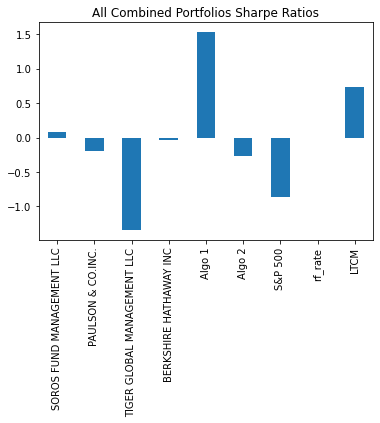

In [91]:
# Visualize the sharpe ratios as a bar plot
all_combined_sharpe_ratios.plot(kind="bar", title="All Combined Portfolios Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [96]:
f"My portfolio, LTCM (Long-Term Capital Management) outperformed all the other portfolios with the exception of Algo 1"

'My portfolio, LTCM (Long-Term Capital Management) outperformed all the other portfolios with the exception of Algo 1'